# Importing stuff

In [1]:
!pip -q install tensorflow

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn import model_selection
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

set the figure size

In [3]:
mpl.rcParams['figure.figsize'] = (5, 5)

copying csv from gdrive

In [4]:
! cp -vr 'drive/MyDrive/Capstone Project/Resources/File CSV' '.'

'drive/MyDrive/Capstone Project/Resources/File CSV/fenny_train.csv' -> './File CSV/fenny_train.csv'
'drive/MyDrive/Capstone Project/Resources/File CSV/yuli_train.csv' -> './File CSV/yuli_train.csv'
'drive/MyDrive/Capstone Project/Resources/File CSV/iky_train.csv' -> './File CSV/iky_train.csv'
'drive/MyDrive/Capstone Project/Resources/File CSV/daffa_train.csv' -> './File CSV/daffa_train.csv'
'drive/MyDrive/Capstone Project/Resources/File CSV/mujidi_train.csv' -> './File CSV/mujidi_train.csv'
'drive/MyDrive/Capstone Project/Resources/File CSV/faqih_train.csv' -> './File CSV/faqih_train.csv'


In [5]:
path = 'File CSV'
df1 = pd.DataFrame()
for fname in os.listdir(path):
  if fname == 'faqih_train.csv':
    print('skipping one file')
    continue
  with open(path + '/' + fname) as fcsv:
   temp = pd.read_csv(fcsv)
   df1 = pd.concat([df1, temp])
df1

skipping one file


,IMAGE_NAME,LABEL,RIGHT_HAND_PROB,LEFT_HAND_PROB,RIGHT_X_WRIST,RIGHT_Y_WRIST,RIGHT_Z_WRIST,RIGHT_X_THUMB_CMC,RIGHT_Y_THUMB_CMC,RIGHT_Z_THUMB_CMC,RIGHT_X_THUMB_MCP,RIGHT_Y_THUMB_MCP,RIGHT_Z_THUMB_MCP,RIGHT_X_THUMB_IP,RIGHT_Y_THUMB_IP,RIGHT_Z_THUMB_IP,RIGHT_X_THUMB_TIP,RIGHT_Y_THUMB_TIP,RIGHT_Z_THUMB_TIP,RIGHT_X_INDEX_FINGER_MCP,RIGHT_Y_INDEX_FINGER_MCP,RIGHT_Z_INDEX_FINGER_MCP,RIGHT_X_INDEX_FINGER_PIP,RIGHT_Y_INDEX_FINGER_PIP,RIGHT_Z_INDEX_FINGER_PIP,RIGHT_X_INDEX_FINGER_DIP,RIGHT_Y_INDEX_FINGER_DIP,RIGHT_Z_INDEX_FINGER_DIP,RIGHT_X_INDEX_FINGER_TIP,RIGHT_Y_INDEX_FINGER_TIP,RIGHT_Z_INDEX_FINGER_TIP,RIGHT_X_MIDDLE_FINGER_MCP,RIGHT_Y_MIDDLE_FINGER_MCP,RIGHT_Z_MIDDLE_FINGER_MCP,RIGHT_X_MIDDLE_FINGER_PIP,RIGHT_Y_MIDDLE_FINGER_PIP,RIGHT_Z_MIDDLE_FINGER_PIP,RIGHT_X_MIDDLE_FINGER_DIP,RIGHT_Y_MIDDLE_FINGER_DIP,RIGHT_Z_MIDDLE_FINGER_DIP,...,LEFT_Z_INDEX_FINGER_DIP,LEFT_X_INDEX_FINGER_TIP,LEFT_Y_INDEX_FINGER_TIP,LEFT_Z_INDEX_FINGER_TIP,LEFT_X_MIDDLE_FINGER_MCP,LEFT_Y_MIDDLE_FINGER_MCP,LEFT_Z_MIDDLE_FINGER_MCP,LEFT_X_MIDDLE_FINGER_PIP,LEFT_Y_MIDDLE_FINGER_PIP,LEFT_Z_MIDDLE_FINGER_PIP,LEFT_X_MIDDLE_FINGER_DIP,LEFT_Y_MIDDLE_FINGER_DIP,LEFT_Z_MIDDLE_FINGER_DIP,LEFT_X_MIDDLE_FINGER_TIP,LEFT_Y_MIDDLE_FINGER_TIP,LEFT_Z_MIDDLE_FINGER_TIP,LEFT_X_RING_FINGER_MCP,LEFT_Y_RING_FINGER_MCP,LEFT_Z_RING_FINGER_MCP,LEFT_X_RING_FINGER_PIP,LEFT_Y_RING_FINGER_PIP,LEFT_Z_RING_FINGER_PIP,LEFT_X_RING_FINGER_DIP,LEFT_Y_RING_FINGER_DIP,LEFT_Z_RING_FINGER_DIP,LEFT_X_RING_FINGER_TIP,LEFT_Y_RING_FINGER_TIP,LEFT_Z_RING_FINGER_TIP,LEFT_X_PINKY_MCP,LEFT_Y_PINKY_MCP,LEFT_Z_PINKY_MCP,LEFT_X_PINKY_PIP,LEFT_Y_PINKY_PIP,LEFT_Z_PINKY_PIP,LEFT_X_PINKY_DIP,LEFT_Y_PINKY_DIP,LEFT_Z_PINKY_DIP,LEFT_X_PINKY_TIP,LEFT_Y_PINKY_TIP,LEFT_Z_PINKY_TIP
0,Jun 01 2021 14:06:02,1,0.999999,0.00000,0.745356,0.938306,-0.000136,0.690620,0.871912,-0.006254,0.645107,0.810729,-0.071363,0.611217,0.777156,-0.144077,0.608094,0.766370,-0.206948,0.732266,0.698220,-0.121724,0.710269,0.581903,-0.195110,0.707994,0.501458,-0.235411,0.712763,0.432782,-0.261367,0.777283,0.732181,-0.155636,0.658035,0.761025,-0.205775,0.647536,0.815897,-0.147924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Jun 01 2021 14:06:16,1,0.999816,0.00000,0.737532,0.914690,-0.000024,0.667246,0.857473,0.026855,0.617181,0.795874,-0.018869,0.584154,0.754380,-0.082763,0.575820,0.733907,-0.142173,0.693688,0.650946,-0.081254,0.674419,0.534894,-0.141724,0.664293,0.452455,-0.180948,0.665138,0.375552,-0.204768,0.730780,0.672873,-0.126064,0.622965,0.712110,-0.156295,0.612725,0.775012,-0.104586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Jun 01 2021 14:06:27,1,0.000000,0.99139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.119769,0.202929,0.418924,-0.146740,0.136239,0.662592,-0.089217,0.210672,0.663391,-0.126752,0.262791,0.700910,-0.148398,0.295978,0.745601,-0.166673,0.113913,0.701171,-0.125563,0.177500,0.723599,-0.162004,0.213827,0.769610,-0.162899,0.231786,0.803178,-0.164709,0.096143,0.743747,-0.162037,0.148923,0.761000,-0.193361,0.185624,0.796277,-0.204229,0.211778,0.826914,-0.214508
3,Jun 01 2021 14:06:35,1,0.000000,1.00000,0.000000,0.00

In [6]:
df2 = pd.read_csv('File CSV/faqih_train.csv')

In [7]:
df1.groupby('LABEL').count()

,IMAGE_NAME,RIGHT_HAND_PROB,LEFT_HAND_PROB,RIGHT_X_WRIST,RIGHT_Y_WRIST,RIGHT_Z_WRIST,RIGHT_X_THUMB_CMC,RIGHT_Y_THUMB_CMC,RIGHT_Z_THUMB_CMC,RIGHT_X_THUMB_MCP,RIGHT_Y_THUMB_MCP,RIGHT_Z_THUMB_MCP,RIGHT_X_THUMB_IP,RIGHT_Y_THUMB_IP,RIGHT_Z_THUMB_IP,RIGHT_X_THUMB_TIP,RIGHT_Y_THUMB_TIP,RIGHT_Z_THUMB_TIP,RIGHT_X_INDEX_FINGER_MCP,RIGHT_Y_INDEX_FINGER_MCP,RIGHT_Z_INDEX_FINGER_MCP,RIGHT_X_INDEX_FINGER_PIP,RIGHT_Y_INDEX_FINGER_PIP,RIGHT_Z_INDEX_FINGER_PIP,RIGHT_X_INDEX_FINGER_DIP,RIGHT_Y_INDEX_FINGER_DIP,RIGHT_Z_INDEX_FINGER_DIP,RIGHT_X_INDEX_FINGER_TIP,RIGHT_Y_INDEX_FINGER_TIP,RIGHT_Z_INDEX_FINGER_TIP,RIGHT_X_MIDDLE_FINGER_MCP,RIGHT_Y_MIDDLE_FINGER_MCP,RIGHT_Z_MIDDLE_FINGER_MCP,RIGHT_X_MIDDLE_FINGER_PIP,RIGHT_Y_MIDDLE_FINGER_PIP,RIGHT_Z_MIDDLE_FINGER_PIP,RIGHT_X_MIDDLE_FINGER_DIP,RIGHT_Y_MIDDLE_FINGER_DIP,RIGHT_Z_MIDDLE_FINGER_DIP,RIGHT_X_MIDDLE_FINGER_TIP,...,LEFT_Z_INDEX_FINGER_DIP,LEFT_X_INDEX_FINGER_TIP,LEFT_Y_INDEX_FINGER_TIP,LEFT_Z_INDEX_FINGER_TIP,LEFT_X_MIDDLE_FINGER_MCP,LEFT_Y_MIDDLE_FINGER_MCP,LEFT_Z_MIDDLE_FINGER_MCP,LEFT_X_MIDDLE_FINGER_PIP,LEFT_Y_MIDDLE_FINGER_PIP,LEFT_Z_MIDDLE_FINGER_PIP,LEFT_X_MIDDLE_FINGER_DIP,LEFT_Y_MIDDLE_FINGER_DIP,LEFT_Z_MIDDLE_FINGER_DIP,LEFT_X_MIDDLE_FINGER_TIP,LEFT_Y_MIDDLE_FINGER_TIP,LEFT_Z_MIDDLE_FINGER_TIP,LEFT_X_RING_FINGER_MCP,LEFT_Y_RING_FINGER_MCP,LEFT_Z_RING_FINGER_MCP,LEFT_X_RING_FINGER_PIP,LEFT_Y_RING_FINGER_PIP,LEFT_Z_RING_FINGER_PIP,LEFT_X_RING_FINGER_DIP,LEFT_Y_RING_FINGER_DIP,LEFT_Z_RING_FINGER_DIP,LEFT_X_RING_FINGER_TIP,LEFT_Y_RING_FINGER_TIP,LEFT_Z_RING_FINGER_TIP,LEFT_X_PINKY_MCP,LEFT_Y_PINKY_MCP,LEFT_Z_PINKY_MCP,LEFT_X_PINKY_PIP,LEFT_Y_PINKY_PIP,LEFT_Z_PINKY_PIP,LEFT_X_PINKY_DIP,LEFT_Y_PINKY_DIP,LEFT_Z_PINKY_DIP,LEFT_X_PINKY_TIP,LEFT_Y_PINKY_TIP,LEFT_Z_PINKY_TIP
LABEL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
10,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
3,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
4,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
5,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
6,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
7,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16

In [8]:
df2.groupby('LABEL').count()

,IMAGE_NAME,RIGHT_HAND_PROB,LEFT_HAND_PROB,RIGHT_X_WRIST,RIGHT_Y_WRIST,RIGHT_Z_WRIST,RIGHT_X_THUMB_CMC,RIGHT_Y_THUMB_CMC,RIGHT_Z_THUMB_CMC,RIGHT_X_THUMB_MCP,RIGHT_Y_THUMB_MCP,RIGHT_Z_THUMB_MCP,RIGHT_X_THUMB_IP,RIGHT_Y_THUMB_IP,RIGHT_Z_THUMB_IP,RIGHT_X_THUMB_TIP,RIGHT_Y_THUMB_TIP,RIGHT_Z_THUMB_TIP,RIGHT_X_INDEX_FINGER_MCP,RIGHT_Y_INDEX_FINGER_MCP,RIGHT_Z_INDEX_FINGER_MCP,RIGHT_X_INDEX_FINGER_PIP,RIGHT_Y_INDEX_FINGER_PIP,RIGHT_Z_INDEX_FINGER_PIP,RIGHT_X_INDEX_FINGER_DIP,RIGHT_Y_INDEX_FINGER_DIP,RIGHT_Z_INDEX_FINGER_DIP,RIGHT_X_INDEX_FINGER_TIP,RIGHT_Y_INDEX_FINGER_TIP,RIGHT_Z_INDEX_FINGER_TIP,RIGHT_X_MIDDLE_FINGER_MCP,RIGHT_Y_MIDDLE_FINGER_MCP,RIGHT_Z_MIDDLE_FINGER_MCP,RIGHT_X_MIDDLE_FINGER_PIP,RIGHT_Y_MIDDLE_FINGER_PIP,RIGHT_Z_MIDDLE_FINGER_PIP,RIGHT_X_MIDDLE_FINGER_DIP,RIGHT_Y_MIDDLE_FINGER_DIP,RIGHT_Z_MIDDLE_FINGER_DIP,RIGHT_X_MIDDLE_FINGER_TIP,...,LEFT_Z_INDEX_FINGER_DIP,LEFT_X_INDEX_FINGER_TIP,LEFT_Y_INDEX_FINGER_TIP,LEFT_Z_INDEX_FINGER_TIP,LEFT_X_MIDDLE_FINGER_MCP,LEFT_Y_MIDDLE_FINGER_MCP,LEFT_Z_MIDDLE_FINGER_MCP,LEFT_X_MIDDLE_FINGER_PIP,LEFT_Y_MIDDLE_FINGER_PIP,LEFT_Z_MIDDLE_FINGER_PIP,LEFT_X_MIDDLE_FINGER_DIP,LEFT_Y_MIDDLE_FINGER_DIP,LEFT_Z_MIDDLE_FINGER_DIP,LEFT_X_MIDDLE_FINGER_TIP,LEFT_Y_MIDDLE_FINGER_TIP,LEFT_Z_MIDDLE_FINGER_TIP,LEFT_X_RING_FINGER_MCP,LEFT_Y_RING_FINGER_MCP,LEFT_Z_RING_FINGER_MCP,LEFT_X_RING_FINGER_PIP,LEFT_Y_RING_FINGER_PIP,LEFT_Z_RING_FINGER_PIP,LEFT_X_RING_FINGER_DIP,LEFT_Y_RING_FINGER_DIP,LEFT_Z_RING_FINGER_DIP,LEFT_X_RING_FINGER_TIP,LEFT_Y_RING_FINGER_TIP,LEFT_Z_RING_FINGER_TIP,LEFT_X_PINKY_MCP,LEFT_Y_PINKY_MCP,LEFT_Z_PINKY_MCP,LEFT_X_PINKY_PIP,LEFT_Y_PINKY_PIP,LEFT_Z_PINKY_PIP,LEFT_X_PINKY_DIP,LEFT_Y_PINKY_DIP,LEFT_Z_PINKY_DIP,LEFT_X_PINKY_TIP,LEFT_Y_PINKY_TIP,LEFT_Z_PINKY_TIP
LABEL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
5,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
6,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
7,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10

# EDA

In [9]:
label_list = []
numeric = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
alphabet = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
def drop_row(df, drop_list):
  for i in drop_list:
    df = df[df['LABEL'] != i]
  return df

In [10]:
# if you want to use numeric symbol (11)
label_list.extend(numeric)
# if you want to use alphabetic symbol (26)
label_list.extend(alphabet)

In [11]:
# df1 = drop_row(df1, numeric)
# df2 = drop_row(df2, numeric)

In [12]:
encoder = LabelBinarizer()
encoder.fit(label_list)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [13]:
def parse_df(df, mix=False):
  df = df.copy()
  if mix:
    df = shuffle(df).reset_index(drop=True)
  df_label = df.pop('LABEL')
  df_train = np.array(df.drop(['IMAGE_NAME'], axis=1))
  return df_train, df_label

In [14]:
df1_train, df1_label = parse_df(df1, mix=True)
df1_label = encoder.transform(df1_label)

In [15]:
df2_train, df2_label = parse_df(df2)
df2_label = encoder.transform(df2_label)

In [16]:
val_x, test_x, val_y, test_y = model_selection.train_test_split(df2_train,df2_label,test_size = 0.5, stratify=df2_label)

In [17]:
print(f'total data {len(df1_train)+len(val_x)+len(val_x)}\ntraining with {len(df1_train)} data\nvalidating with {len(val_x)} data\ntesting with {len(val_x)} data')

total data 1061
training with 691 data
validating with 185 data
testing with 185 data


# Training the model

In [18]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

CALLBACKS = [tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=30,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)]

In [19]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_dim=128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(len(label_list), activation='softmax')                   
])

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = METRICS )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 37)                4773      
Total params: 37,797
Trainable params: 37,797
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    df1_train,
    df1_label,
    epochs=200,
    validation_data=(df2_train, df2_label),
    batch_size = 2,
    verbose=1,
    callbacks = CALLBACKS
)

Epoch 1/200
346/346 [==============================] - 4s 6ms/step - loss: 3.6381 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 24876.0000 - fn: 691.0000 - accuracy: 0.9730 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5376 - prc: 0.0320 - val_loss: 3.5225 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 13320.0000 - val_fn: 370.0000 - val_accuracy: 0.9730 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6646 - val_prc: 0.0479
Epoch 2/200
346/346 [==============================] - 1s 3ms/step - loss: 3.4234 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 24876.0000 - fn: 691.0000 - accuracy: 0.9730 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6863 - prc: 0.0545 - val_loss: 3.2114 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 13320.0000 - val_fn: 370.0000 - val_accuracy: 0.9730 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7709 - val_prc: 0.0660
Epoch 3/200
346/346 [==============================] - 1s 3ms/step - loss: 3.2372 - tp: 0.0000

# Evaluation

In [21]:
def plot_loss(history, fname, save = False):
  # use normal plot
  plt.plot(history.epoch, history.history['loss'], label='train loss')
  plt.plot(history.epoch, history.history['val_loss'], label='val loss', linestyle="--")
  plt.legend()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  if save:
    plt.savefig('Loss'+fname+'.png')
  plt.figure()
  plt.plot(history.epoch, history.history['accuracy'], label='train accuracy')
  plt.plot(history.epoch, history.history['val_accuracy'], label='val accuracy', linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Acc')
  plt.legend()
  if save:
    plt.savefig('Acc'+fname+'.png')

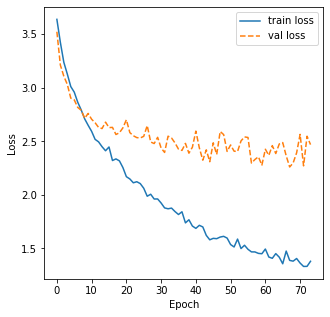

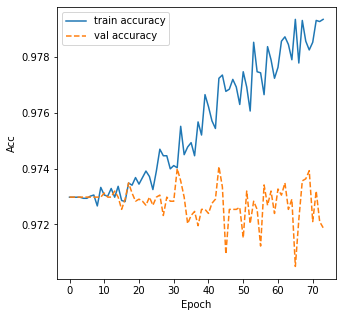

In [22]:
plot_loss(history, '37class', save=True)

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

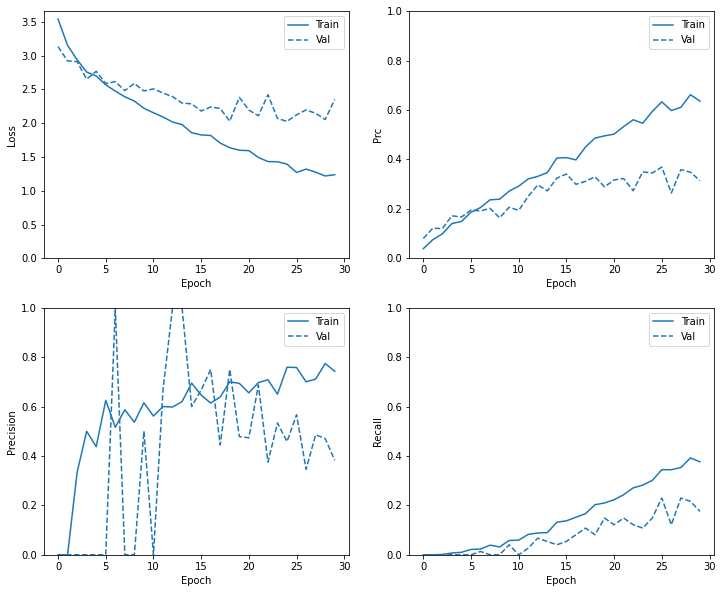

In [ ]:
plot_metrics(history)

In [60]:
predictions = model.predict(test_x)

In [28]:
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions, labels=label_list)
  plt.figure(figsize=(15,15))
  sns.heatmap(cm, annot=True, fmt="d", yticklabels=label_list, xticklabels=label_list)
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

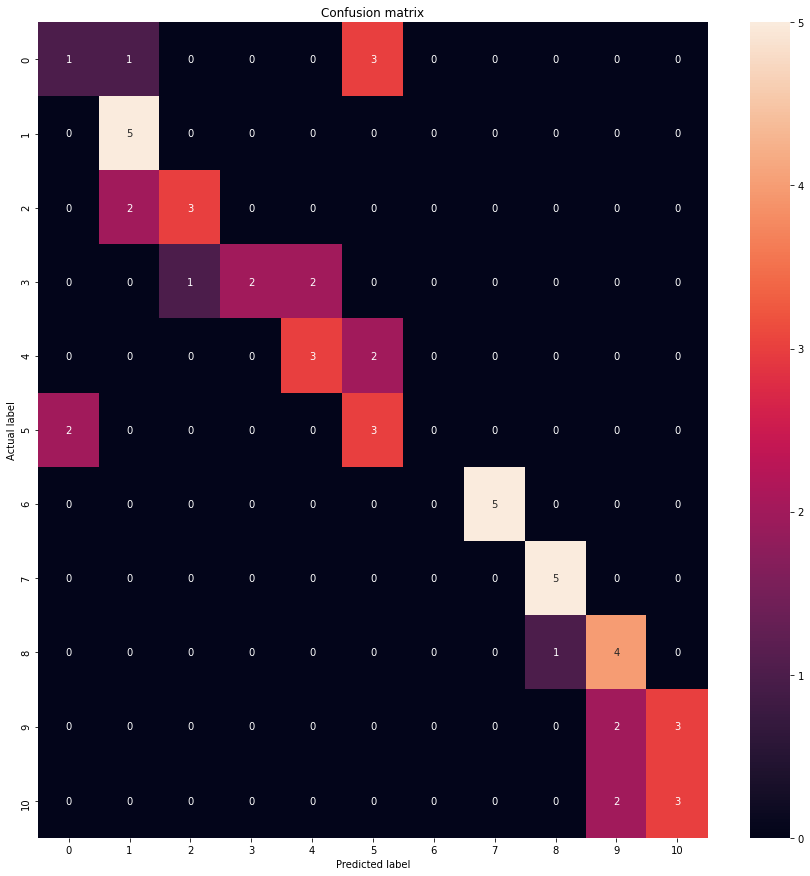

In [61]:
plot_cm(encoder.inverse_transform(test_y), encoder.inverse_transform(predictions))

# Saving the model

In [23]:
fname = './class37'
# tf pb file
tf.saved_model.save(model, fname +".pb")


# keras h5 file
model.save(fname+".h5",include_optimizer=False)



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ./class37.pb/assets


In [24]:
!zip -r ./class37.zip ./class37

  adding: class37/ (stored 0%)
  adding: class37/class37.h5 (deflated 14%)
  adding: class37/Loss37class.png (deflated 3%)
  adding: class37/Acc37class.png (deflated 3%)
  adding: class37/class37.pb/ (stored 0%)
  adding: class37/class37.pb/variables/ (stored 0%)
  adding: class37/class37.pb/variables/variables.index (deflated 69%)
  adding: class37/class37.pb/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: class37/class37.pb/assets/ (stored 0%)
  adding: class37/class37.pb/saved_model.pb (deflated 89%)
